In [155]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns

# Data Loading

In [117]:
df = pd.read_excel('global_laptop_selling_data.xlsx')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Data Analysis

In [118]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

# Unnecessary Column removal

In [119]:
df.drop(columns=['laptop_ID'],inplace=True)
df.head(1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69


# Column Data Fixing 

In [120]:
df['Ram'] = df['Ram'].str.replace('GB','').astype('int32')
df['Weight'] = df['Weight'].str.replace('kg','').astype('float32')
df.head(1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69


#### Memory Column

In [121]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [122]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
df['Memory'].value_counts()

Memory
256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD   

In [123]:
new = df["Memory"].str.split("+", n=1, expand=True)
new.value_counts()

0                  1            
128 SSD              1000 HDD       94
256 SSD              1000 HDD       73
512 SSD              1000 HDD       14
256 SSD              2000 HDD       10
512 SSD              2000 HDD        3
1000 SSD             1000 HDD        2
128 SSD              2000 HDD        2
256 SSD              256 SSD         2
                     500 HDD         2
1000 HDD             1000 HDD        1
256 SSD              1000 Hybrid     1
512 SSD              1000 Hybrid     1
                     256 SSD         1
                     512 SSD         1
64 Flash Storage     1000 HDD        1
Name: count, dtype: int64

In [124]:
df["first"] = new[0]
df["first"] = df["first"].str.strip()
df["second"] = new[1]
df.head(1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,first,second
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128 SSD,None


In [125]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df.head(1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128 SSD,None,0,1,0,0


In [126]:
df['first'] = df['first'].str.extract(r'(\d+)', expand=False) #removes all non-digit characters from the 'first' column
df.head(1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,None,0,1,0,0


In [127]:
df["second"].fillna("0", inplace=True)  #fills any missing values in the 'second' column with '0'
df.sample(1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
588,Lenovo,Ideapad 320-15IKBR,Notebook,15.6,Touchscreen 1366x768,Intel Core i7 8550U 1.8GHz,12,1000 HDD,Intel HD Graphics 620,Windows 10,2.2,609.0,1000,0,1,0,0,0


In [128]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)


In [129]:
df['second'] = df['second'].str.extract(r'(\d+)', expand=False)

df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
171,HP,17-bs001nv (i5-7200U/6GB/2TB/Radeon,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,2000 HDD,AMD Radeon 520,Windows 10,...,2000,0,1,0,0,0,0,0,0,0
1173,Lenovo,V110-15ISK (i5-6200U/4GB/500GB/No,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500 HDD,Intel HD Graphics 520,No OS,...,500,0,1,0,0,0,0,0,0,0
980,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512 SSD,Intel HD Graphics 620,Windows 10,...,512,0,0,1,0,0,0,0,0,0
321,Lenovo,IdeaPad 320-17IKB,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,4,1000 HDD,Nvidia GeForce 920MX,Windows 10,...,1000,0,1,0,0,0,0,0,0,0
1238,MSI,GL62 6QF,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,...,128,1000,0,1,0,0,1,0,0,0


In [130]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [131]:
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])


In [132]:
df.drop(
    columns=[
        'first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
        'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
        'Layer2Flash_Storage'
    ],
    inplace=True
)
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,HDD,SSD,Hybrid,Flash_Storage
12,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16,256 SSD,AMD Radeon Pro 555,macOS,1.83,2439.97,0,256,0,0
1058,Dell,Inspiron 7378,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,256 SSD,Intel HD Graphics 620,Windows 10,1.60,1299.00,0,256,0,0
186,Dell,XPS 15,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512 SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,2397.00,0,512,0,0


In [133]:
df.drop(columns=['Memory'],inplace=True)
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,HDD,SSD
76,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,2.20,519.0,2000,0
565,Dell,XPS 13,Ultrabook,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 8250U 1.6GHz,8,Intel UHD Graphics 620,Windows 10,1.21,1599.0,0,128
622,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,AMD Radeon 530,Windows 10,2.20,776.0,1000,0


#### OpSys Column

In [134]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [135]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others'

df['OS'] = df['OpSys'].apply(cat_os)

In [136]:
df.drop(columns=['OpSys'],inplace=True)
df['OS'].value_counts()

OS
Windows    1125
Others      157
Mac          21
Name: count, dtype: int64

#### Gpu Column

In [137]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      282
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
ARM Mali T860 MP4            1
Name: count, Length: 106, dtype: int64

In [138]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df.sample(1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,Weight,Price_euros,HDD,SSD,OS,Gpu brand
1257,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,Intel HD Graphics 520,2.29,490.0,500,0,Windows,Intel


In [139]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [140]:
df = df[df['Gpu brand'] != 'ARM']
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [141]:
df.drop(columns=['Gpu'],inplace=True)
df.head(1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Weight,Price_euros,HDD,SSD,OS,Gpu brand
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,1.37,1339.69,0,128,Mac,Intel


#### Cpu Column

In [142]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i5 2.9GHz               1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v5 2.9GHz      1
Name: count, Length: 117, dtype: int64

In [143]:
def cpu_naming(text):
    if 'Intel Xeon' in text or 'Intel Atom' in text:
        return " ".join(text.split()[0:2])
    elif 'Intel' in text:
        return " ".join(text.split()[0:3])
    else:
        return " ".join(text.split()[0:2])

df['Cpu Name'] = df['Cpu'].apply(cpu_naming)
df['Cpu Name'].value_counts()

Cpu Name
Intel Core i7         527
Intel Core i5         423
Intel Core i3         136
Intel Celeron Dual     80
Intel Pentium Quad     27
Intel Core M           19
AMD A9-Series          17
Intel Atom             13
AMD A6-Series          11
AMD E-Series            9
Intel Celeron Quad      8
AMD A12-Series          8
AMD A10-Series          6
AMD A8-Series           4
AMD Ryzen               4
Intel Xeon              4
Intel Pentium Dual      3
AMD FX                  2
AMD A4-Series           1
Name: count, dtype: int64

In [144]:
df['Cpu Speed'] = df['Cpu'].apply(lambda x: x.split()[-1].replace('GHz', '')).astype('float')
df['Cpu Speed'].value_counts()

Cpu Speed
2.50    293
2.70    166
2.80    165
1.60    134
2.30     86
2.00     85
1.80     78
2.60     76
1.10     53
2.40     52
2.90     21
3.00     19
1.20     15
1.44     12
2.20     11
1.50     10
1.30      6
3.60      5
0.90      4
3.10      3
2.10      3
1.90      2
3.20      1
1.00      1
1.92      1
Name: count, dtype: int64

In [145]:
df.drop(columns=['Cpu'],inplace=True)
df.head(1)

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Weight,Price_euros,HDD,SSD,OS,Gpu brand,Cpu Name,Cpu Speed
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,1.37,1339.69,0,128,Mac,Intel,Intel Core i5,2.3


#### ScreenResolution Column

In [146]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [147]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.head(1)

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Weight,Price_euros,HDD,SSD,OS,Gpu brand,Cpu Name,Cpu Speed,TouchScreen,IPS
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,1.37,1339.69,0,128,Mac,Intel,Intel Core i5,2.3,0,1


In [148]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_resolution'] = new[0]
df['Y_resolution'] = (new[1]).astype('int')
df.head(1)

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Weight,Price_euros,HDD,SSD,OS,Gpu brand,Cpu Name,Cpu Speed,TouchScreen,IPS,X_resolution,Y_resolution
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,1.37,1339.69,0,128,Mac,Intel,Intel Core i5,2.3,0,1,IPS Panel Retina Display 2560,1600


In [149]:
df['X_resolution'].value_counts()

X_resolution
Full HD 1920                                507
1366                                        281
IPS Panel Full HD 1920                      231
IPS Panel Full HD / Touchscreen 1920         53
Full HD / Touchscreen 1920                   47
1600                                         23
Touchscreen 1366                             16
Quad HD+ / Touchscreen 3200                  15
IPS Panel 4K Ultra HD 3840                   12
IPS Panel 4K Ultra HD / Touchscreen 3840     11
4K Ultra HD / Touchscreen 3840               10
4K Ultra HD 3840                              7
Touchscreen 2560                              7
IPS Panel 1366                                7
IPS Panel Quad HD+ / Touchscreen 3200         6
IPS Panel Retina Display 2560                 6
IPS Panel Retina Display 2304                 6
Touchscreen 2256                              6
IPS Panel Touchscreen 2560                    5
IPS Panel Retina Display 2880                 4
IPS Panel Touchscreen 1920 

In [150]:
df['X_resolution'] = df['X_resolution'].apply(lambda x: x.split()[-1]).astype('int')
df['X_resolution'].value_counts()

X_resolution
1920    846
1366    308
3840     43
2560     29
3200     27
1600     23
2304      6
2256      6
1440      4
2880      4
2400      3
2160      2
2736      1
Name: count, dtype: int64

In [151]:
df['pixel_per_inches'] = (((df['X_resolution']**2) + (df['Y_resolution']**2))**0.5/df['Inches']).astype('float')
df.drop(columns=['Inches','X_resolution','Y_resolution','ScreenResolution'],inplace=True)
df.sample(3)

,Company,Product,TypeName,Ram,Weight,Price_euros,HDD,SSD,OS,Gpu brand,Cpu Name,Cpu Speed,TouchScreen,IPS,pixel_per_inches
692,HP,ZBook 17,Workstation,8,3.14,1907.99,500,0,Windows,Nvidia,Intel Core i7,2.8,0,0,127.335675
36,Acer,Aspire 3,Notebook,4,2.10,367.00,1000,0,Others,Intel,Intel Core i3,2.7,0,0,100.454670
216,Lenovo,IdeaPad 320-17IKB,Notebook,8,2.80,589.00,1000,0,Others,Nvidia,Intel Core i5,2.5,0,0,106.113062


In [152]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: count, dtype: int64

### Label Encoding

In [153]:
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

df.sample(3)

,Company,Product,TypeName,Ram,Weight,Price_euros,HDD,SSD,OS,Gpu brand,Cpu Name,Cpu Speed,TouchScreen,IPS,pixel_per_inches
541,4,548,3,4,1.60,735.87,0,128,2,1,13,2.0,0,0,157.350512
746,15,308,4,16,0.81,1649.00,0,256,2,1,15,2.7,0,0,165.632118
847,2,604,4,8,1.45,1026.00,0,512,2,2,14,2.3,0,1,165.632118


### Model Building

In [154]:
x = df.drop('Price_euros', axis=1)
y = df['Price_euros']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2,random_state=42)

In [159]:
def model(model):
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    r2 = r2_score(ytest, y_pred)
    mse = mean_squared_error(ytest, y_pred)
    mae = mean_absolute_error(ytest, y_pred)
    acc = model.score(xtest, ytest)
    print(str(model)+ ' --> ' +str(acc))
    print(f"R2 Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    return acc

In [160]:
lr = LinearRegression()
lr_acc = model(lr)

dt = DecisionTreeRegressor()
dt_acc = model(dt)

rf = RandomForestRegressor()
rf_acc = model(rf)

knn = KNeighborsRegressor()
knn_acc = model(knn)

svr = SVR()
svr_acc = model(svr)

LinearRegression() --> 0.7144509891013144
R2 Score: 0.7145
MSE: 143719.3710
MAE: 276.4863
DecisionTreeRegressor() --> 0.7928655854253082
R2 Score: 0.7929
MSE: 104252.6033
MAE: 209.1308
RandomForestRegressor() --> 0.8485505175287853
R2 Score: 0.8486
MSE: 76225.8790
MAE: 170.0828
KNeighborsRegressor() --> 0.6128413018514041
R2 Score: 0.6128
MSE: 194860.4353
MAE: 281.1372
SVR() --> 0.02951964027925147
R2 Score: 0.0295
MSE: 488451.4444
MAE: 489.5361


<Axes: xlabel='Regressor', ylabel='Accuracy'>

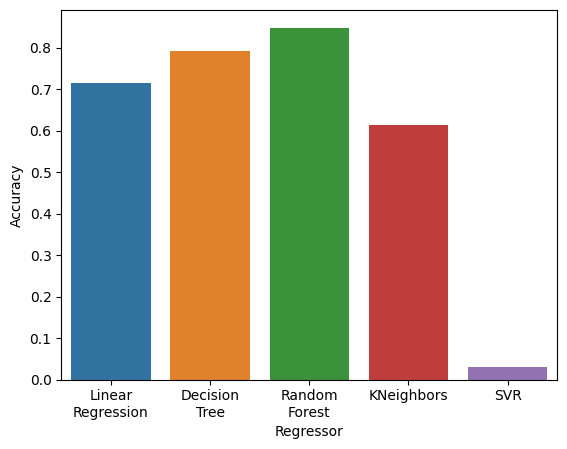

In [161]:
data = {
    'Regressor': ['Linear\nRegression', 'Decision\nTree', 'Random\nForest', 'KNeighbors', 'SVR'],
    'Accuracy': [lr_acc, dt_acc, rf_acc, knn_acc, svr_acc]
}
data = pd.DataFrame(data=data)
sns.barplot(x='Regressor',y='Accuracy',data=data)

#### So the best model is Random Forest Regressor

### Hyperparameter tunning

In [162]:
parameters = {'n_estimators': [10, 50, 100],
              'criterion': ['squared_error', 'absolute_error', 'poisson']}

grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)

grid_fit = grid_obj.fit(xtrain, ytrain)

best_model = grid_fit.best_estimator_

score = best_model.score(xtest, ytest)

print("Best Model Score:", score)

Best Model Score: 0.8533372431571367
